### ENSAYO

Nombre: Jahaira Rodriguez 

Codigo: 20201405

En la siguiente lectura de los autores Bell, Jaravel, Petkova y Van, en donde la pregunta de investigación ¿Cómo es  posible que los factores como la clase, raza y sexo sean determinantes para que una persona se convierte en inventor? Entonces se argumenta que los mecanismos de transmisión serían el desarrollo del capital humano, mentorías y redes de contacto. Es por esto que, los autores utilizan una mezcla de bases de datos. En primer lugar, se emplea una base de datos de patentes emparejadas con base de datos de contribuyentes (impuestos) de EEUU. Se observa además, que la probabilidad de convertirse en inventor es mayor en el top 1% de los ingresos de los padres comparándolo con los de debajo de la mediana. Asimismo, se encontró que existen diferencias étnicas favorables para los asiáticos y blancos no hispanos y desfavorables para negros no hispanos e hispanos, aun emparejando por ingresos y resultandos en los test.  Y por otro, se observaron si habían diferencias en habilidades las cuáles explicarían diferencias en innovación. 
Algunas de las debilidades es que se podrían haber buscado otras variables relacionadas a la innovación y a las preguntas de investigación para incorporarlas en el manejo de la data. Se puede replicar la metodología empleada para el caso de países en desarrollo o para el caso de Perú. Alguna de las fortalezas es que implican un abordaje coherente e innovador con las recientes evidencias de una dimensión poco analizada, que es la exposición de los niños al entorno como un factor que puede influir en la probabilidad de ser inventor, sobretodo a través de la clase de tecnología y del género al que están expuestos. También, se demuestra que existen diferencias en las probabilidades de que los niños se conviertan en inventores, y estas se ven afectadas por características al nacer. Este articulo que consolidado de información incluye estadísticas sobre la distribución de los ingresos de los inventores por año y por citas.
Por otro lado, algunos artículos que han trabajado en estas dimensiones son sobre aspectos en el desarrollo o evolución profesional de los inventores, en el sentido de investigar qué incentivos o limitaciones pueden enfrentarse. 


### CÓDIGO

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, warnings
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')
from causalgraphicalmodels import CausalGraphicalModel
from cProfile import label
%matplotlib inline

### 2

La regresión discontinua es un método cuasiexperimental que busca evaluar los efectos causales de algún tratamiento, que implican una discontinuidad en la implementación del mismo, por lo que la probabilidad de participación en él cambia de manera discontinua en un punto de corte de la variable de asignación. Esta permitirá ver la relación causal de cambios en el estatus de tratamiento sobre la variable dependiente. Un ejemplo de esto, puede ser la edad minima para poder ingerir alcohol, ya que si el consumo del alcohol aumenta mucho la tasa de mortalidad, deberíamos evitar bajar la edad mínima para beber. Entonces, aquí la edad legal para beber impone una discontinuidad en la naturaleza.

Sharp Design se usa para formar parte del tratamiento pasa de 0 a 1 en la discontinuidad en casos en los que el tratamiento se asigna de acuerdo con un punto de corte discreto en el que todos los elegibles reciben el tratamiento y todos los no elegibles no lo reciben. Un ejemplo en donde lo podríamos aplicar puede ser en la prueba de programas, en donde es posible usar un diseño de regresión discontinua sharp de modo que es posible explorar la asignación de los estudiantes a la recuperación. Otro ejemplo podría ser, el uso de este para un programa de becas, que se le aplica a cierto grupo de personas. 

### 3.1

In [12]:
dat = pd.DataFrame({'x': np.random.normal(50, 25, 1000)}) #50 siendo promedio y 25 varianza, puede elegir cualquier numero
dat.loc[dat.x<0, 'x'] = 0 #ubicar las observaciones que x sea menor a 0
dat = dat[dat.x<100]
dat['D'] = 0 #generar una columna igual a 0
# Cutoff
dat.loc[dat.x>50, 'D'] = 1 #para todas las observaciones que su valor sea por encima del 50, la variable de tratamiento sea = 1
# Simulated Y - se va a crear la variable Y, se generá la ecuasión
dat['y'] = 15 + 22*dat.D + 2.5 * dat.x + np.random.normal(0, 20, dat.shape[0])
# Not Treatment: los no tratados, de la columna D que son 0
dat_0 = dat[dat.D == 0]
# Treatment
dat_1 = dat[dat.D == 1]

In [13]:
dat = pd.DataFrame({'x': np.random.normal(50, 25, 1000)})
dat

,x
0,38.925902
1,61.892308
2,64.771887
3,62.465621
4,44.579380
...,...
995,53.151979
996,75.070911
997,61.082611
998,100.412335


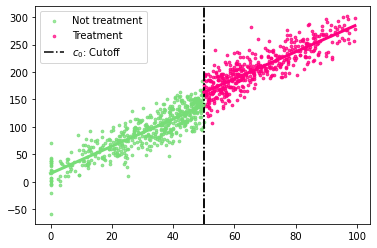

In [14]:
#Plotear grafico

# Colors 
treat_c = "#ff0080" # Treatment
n_treat = "#77dd77" # Not treatment
# Plot
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .7, s = 7, label = "Not treatment") #controles
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .7, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff") 

plt.legend(); 

def y_hat_lin(da_ta, x = "x", y = "y"): #predicción
    yhat = smf.ols(f"{y} ~ {x}", data = da_ta).fit().predict()
    da_ta["yhat"] = yhat
    da_ta.sort_values('yhat', inplace = True)
    return da_ta

data_y0 = y_hat_lin(dat_0)
data_y1 = y_hat_lin(dat_1)

plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .2, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .2, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3);

In [15]:
eff = min(data_y1.yhat) - max(data_y0.yhat) #de las rectascreadsa
eff = round(eff,  2)
print("Effect:", f"{eff}")

Effect: 24.25


In [29]:
#Construcción del modelo 

outcome = "y"
treatment = "D"

fml = outcome + "~" + treatment
ols = smf.ols ("y~D", dat )
ols.fit().summary()

PatsyError: Error evaluating factor: NameError: name 'y' is not defined
    y~D
    ^

### 3.2

In [18]:
dat = pd.DataFrame({'x': np.random.normal(50, 25, 1000)}) #50 siendo promedio y 25 varianza, puede elegir cualquier numero
dat.loc[dat.x<0, 'x'] = 0 #ubicar las observaciones que x sea menor a 0
dat = dat[dat.x<100]
dat['D'] = 0 #generar una columna igual a 0
# Cutoff
dat.loc[dat.x>50, 'D'] = 1 #para todas las observaciones que su valor sea por encima del 50, la variable de tratamiento sea = 1
# Simulated Y - se va a crear la variable Y, se generá la ecuasión
dat['y'] = 12 + 60*dat.D + 1.3 * dat.x + np.random.normal(0, 20, dat.shape[0])
# Not Treatment: los no tratados, de la columna D que son 0
dat_0 = dat[dat.D == 0]
# Treatment
dat_1 = dat[dat.D == 1]

In [19]:
dat = pd.DataFrame({'x': np.random.normal(50, 25, 1000)})
dat

,x
0,80.835649
1,10.168624
2,32.034105
3,43.920546
4,76.140190
...,...
995,52.447835
996,45.787803
997,98.956274
998,69.273998


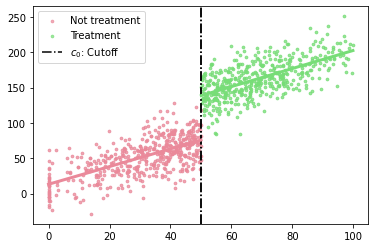

In [20]:
#Plotear grafico

# Colors 
treat_c = "#77dd77" # Treatment
n_treat = "#ea899a" # Not treatment
# Plot
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .7, s = 7, label = "Not treatment") #controles
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .7, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff") 

plt.legend(); 

def y_hat_lin(da_ta, x = "x", y = "y"): #predicción
    yhat = smf.ols(f"{y} ~ {x}", data = da_ta).fit().predict()
    da_ta["yhat"] = yhat
    da_ta.sort_values('yhat', inplace = True)
    return da_ta

data_y0 = y_hat_lin(dat_0)
data_y1 = y_hat_lin(dat_1)

plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .2, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .2, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3);

In [21]:
eff = min(data_y1.yhat) - max(data_y0.yhat) #de las rectascreadsa
eff = round(eff,  2)
print("Effect:", f"{eff}")

Effect: 62.97


In [22]:
#Construcción del segundo modelo 

outcome = "y"
treatment = "D"

fml = outcome + "~" + treatment
ols = smf.ols ("y ~ D", dat )
ols.fit().summary()

PatsyError: Error evaluating factor: NameError: name 'y' is not defined
    y ~ D
    ^

### 4

In [23]:
## Random data
dat = pd.DataFrame({'x': np.random.normal(50, 25, 1000)})
dat.loc[dat.x<0, 'x'] = 0
dat = dat[dat.x<100]
dat['D'] = 0
# Cutoff
dat.loc[dat.x>50, 'D'] = 1
# Simulated Y
dat['y'] = 25 + 40*dat.D + 1.5 * dat.x + np.random.normal(0, 20, dat.shape[0])
# Not Treatment
dat_0 = dat[dat.D == 0]
# Treatment
dat_1 = dat[dat.D == 1]

In [24]:
dat = pd.DataFrame({'x': np.random.normal(50, 25, 1000)})
dat

,x
0,67.937995
1,87.536956
2,59.355303
3,47.800288
4,53.615908
...,...
995,54.237033
996,75.735535
997,43.145878
998,31.029083


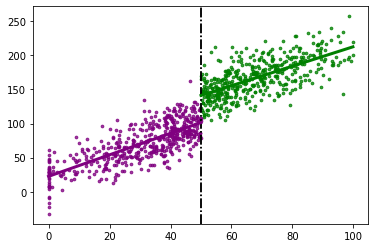

In [26]:
#Plotear grafico

# Colors 
treat_c = "green" # Treatment
n_treat = "purple" # Not treatment
# Plot
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .7, s = 7, label = "Not treatment") #controles
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .7, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff") 


def y_hat_lin(da_ta, x = "x", y = "y"): #predicción
    yhat = smf.ols(f"{y} ~ {x}", data = da_ta).fit().predict()
    da_ta["yhat"] = yhat
    da_ta.sort_values('yhat', inplace = True)
    return da_ta

data_y0 = y_hat_lin(dat_0)
data_y1 = y_hat_lin(dat_1)

plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .2, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .2, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3);

Effect: 39.75


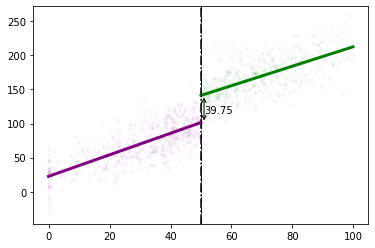

In [27]:
eff = min(data_y1.yhat) - max(data_y0.yhat)
eff = round(eff,  2)
print("Effect:", f"{eff}")

plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .03, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .03, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3)
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff", lw = 1)
plt.annotate(f"{eff}", xy = (51, eff + 76))
plt.annotate("", xy = (51, max(data_y0.yhat)), xytext = (51, min(data_y1.yhat)), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"));